#  CS 522 - Advanced Data Mining - Spring 2016 - Final Project

#                Gender Classification using Twitter Feeds

# Step - 3) Create Gender Labels.

In [3]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pickle
from collections import Counter
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from itertools import product
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
from sampleClass14 import sampleClass14

In [5]:
sampleClass = sampleClass14()

In [6]:
male_names, female_names = sampleClass.get_census_names()

In [7]:
# Load the tweets from pickle file

tweets = pickle.load(open('tweets.pkl', 'rb'))

In [8]:
def get_gender(tweet, male_names, female_names):
    name = sampleClass.get_first_name(tweet)
    if name in female_names:
        return 1
    elif name in male_names:
        return 0
    else:
        return -1

In [9]:
y = np.array([get_gender(t, male_names, female_names) for t in tweets])
print 'gender labels:', Counter(y).items()

gender labels: [(0, 5182), (1, 4818)]


# Step - 4) Fit a Logistic Regression Classifier

In [10]:
def do_cross_val(X, y, nfolds):
    """ Compute average cross-validation acccuracy."""
    cv = KFold(len(y), nfolds)
    accuracies = []
    for train_idx, test_idx in cv:
        clf = LogisticRegression()
        clf.fit(X[train_idx], y[train_idx])
        predicted = clf.predict(X[test_idx])
        acc = accuracy_score(y[test_idx], predicted)
        #cm = confusion_matrix(y[test_idx], predicted)
        #print cm
        accuracies.append(acc)
    avg = np.mean(accuracies)
    return avg

In [48]:
tokens_list = [sampleClass.tweet2tokens(t, use_descr=True, lowercase=True,keep_punctuation=True, descr_prefix='d=',
                            collapse_urls=False, collapse_mentions=False,collapse_stop_words=False)
              for t in tweets]


vocabulary = sampleClass.make_vocabulary(tokens_list)

X = sampleClass.make_feature_matrix(tokens_list,vocabulary,len(tweets))

53816 unique terms in vocabulary


In [49]:
print 'Average Accuracy', do_cross_val(X, y, 5)

Average Accuracy 0.7133


In [54]:
# How does tokenization affect accuracy?
# Collapse urls , mentions and stop words ; ignore description prefix.

def run_all(tweets, use_descr=True, lowercase=True,keep_punctuation=True, descr_prefix=None,
            collapse_urls=True, collapse_mentions=True, use_text=True, collapse_stop_words = True):
    
    tokens_list = [sampleClass.tweet2tokens(t, use_descr, lowercase,keep_punctuation, descr_prefix,
                            collapse_urls, collapse_mentions, use_text,collapse_stop_words)
                  for t in tweets]
    vocabulary = sampleClass.make_vocabulary(tokens_list)
    if len(vocabulary) > 0 :
        X = sampleClass.make_feature_matrix(tokens_list, vocabulary,len(tweets))
        acc = do_cross_val(X, y, 5)
    else:
        acc = 0
    #print 'Accuracy =', acc
    return acc


In [55]:
use_descr_opts = [True, False]
lowercase_opts = [True, False]
keep_punctuation_opts = [True, False]
descr_prefix_opts = ['d=', '']
url_opts = [True, False]
mention_opts = [True, False]
use_text_opts = [True, False]
stop_words_opts = [True, False]

argnames = ['use_descr', 'lower', 'punct', 'prefix', 'url', 'mention', 'use_text', 'collapse_stop_words']
option_iter = product(use_descr_opts, lowercase_opts,keep_punctuation_opts,descr_prefix_opts, url_opts,
                       mention_opts, use_text_opts,stop_words_opts)

results = []
for options in option_iter:
    if options[0] or options[-2]:  # skip options that don't use descr or text.
        #print '\t'.join('%s=%s' % (name, opt) for name, opt in zip(argnames, options))
        acc = run_all(tweets, *options)
        results.append((options, acc))



43183 unique terms in vocabulary
43442 unique terms in vocabulary
22025 unique terms in vocabulary
22155 unique terms in vocabulary
49678 unique terms in vocabulary
49937 unique terms in vocabulary
23462 unique terms in vocabulary
23592 unique terms in vocabulary
47062 unique terms in vocabulary
47321 unique terms in vocabulary
22320 unique terms in vocabulary
22450 unique terms in vocabulary
53557 unique terms in vocabulary
53816 unique terms in vocabulary
23757 unique terms in vocabulary
23887 unique terms in vocabulary
37855 unique terms in vocabulary
37989 unique terms in vocabulary
22025 unique terms in vocabulary
22155 unique terms in vocabulary
44285 unique terms in vocabulary
44419 unique terms in vocabulary
23462 unique terms in vocabulary
23592 unique terms in vocabulary
41735 unique terms in vocabulary
41869 unique terms in vocabulary
22320 unique terms in vocabulary
22450 unique terms in vocabulary
48165 unique terms in vocabulary
48299 unique terms in vocabulary
23757 uniq

In [56]:
# Write the results of all options to an output file

f = open('results.txt','w')
f.write("(use_descr,lower,punct,prefix,url,mention,use_text,collapse_stop_words)")
f.write("\n")
for i in range(0,len(results)):
    f.write(str(results[i]))
    f.write("\n")

In [57]:
# What's the best possible combination?

best_result = max(results, key=lambda x: x[1])
print 'best result:\n\tAccuracy=%g\n\tCombination=%s' % (best_result[1],zip(argnames, best_result[0]))

best result:
	Accuracy=0.7181
	Combination=[('use_descr', True), ('lower', False), ('punct', False), ('prefix', 'd='), ('url', False), ('mention', True), ('use_text', False), ('collapse_stop_words', False)]


In [11]:
# What is the confusion matrix for our best combination ?

def do_confusion_matrix(X, y, nfolds):
    """ Compute Confusion Matrix."""
    cv = KFold(len(y), nfolds)
    accuracies = []
    for train_idx, test_idx in cv:
        clf = LogisticRegression()
        clf.fit(X[train_idx], y[train_idx])
        predicted = clf.predict(X[test_idx])
        acc = accuracy_score(y[test_idx], predicted)
        print acc
        cm = confusion_matrix(y[test_idx], predicted)
        print cm
        accuracies.append(acc)
    avg = np.mean(accuracies)
    return avg

tokens_list = [sampleClass.tweet2tokens(t, use_descr=True, lowercase=False,keep_punctuation=False, descr_prefix='d=',
                            collapse_urls=False, collapse_mentions=True, use_text=False,collapse_stop_words=False)
                  for t in tweets]
vocabulary = sampleClass.make_vocabulary(tokens_list)
if len(vocabulary) > 0 :
    X = sampleClass.make_feature_matrix(tokens_list, vocabulary,len(tweets))
    acc = do_confusion_matrix(X, y, 5)

18605 unique terms in vocabulary
0.6995
[[676 365]
 [236 723]]
0.715
[[686 357]
 [213 744]]
0.728
[[669 364]
 [180 787]]
0.7275
[[672 359]
 [186 783]]
0.7205
[[683 351]
 [208 758]]


In [61]:
# Which decisions had the biggest effect?
# Find max score with option=True and with option=False

def find_max(results, i, value):
    return max(accuracy for options, accuracy in results if options[i] == value)

best_scores = []
for i, argname in enumerate(argnames):
    values = [True, False] if argname != 'prefix' else ['d=', ''] # hack to deal with prefix option.
    best_for_true = find_max(results, i, values[0])
    best_for_false = find_max(results, i, values[1]) 
    print argname, best_for_true, best_for_false
    best_scores.append((argname, best_for_true, best_for_false))

use_descr 0.7181 0.6061
lower 0.7151 0.7181
punct 0.717 0.7181
prefix 0.7181 0.7181
url 0.7165 0.7181
mention 0.7181 0.717
use_text 0.717 0.7181
collapse_stop_words 0.717 0.7181


[['use_descr' '0.7181' '0.6061']
 ['lower' '0.7151' '0.7181']
 ['url' '0.7165' '0.7181']
 ['punct' '0.717' '0.7181']
 ['mention' '0.7181' '0.717']
 ['use_text' '0.717' '0.7181']
 ['collapse_stop_words' '0.717' '0.7181']
 ['prefix' '0.7181' '0.7181']]


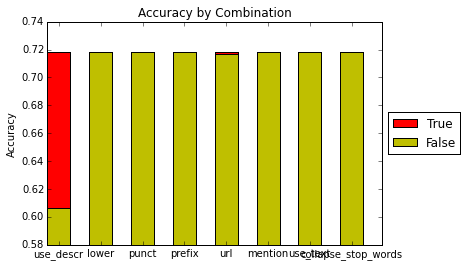

In [63]:
# Plot results as stacked bar chart.
import matplotlib.pyplot as plt

srted = np.argsort([min(b[1], b[2]) for b in best_scores])
best_scores = np.array(best_scores)[srted]
print best_scores
ind = np.arange(len(best_scores))
width = 0.55       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, [float(s[1]) for s in best_scores], width, color='r')
p2 = plt.bar(ind, [float(s[2]) for s in best_scores], width, color='y')
plt.ylabel('Accuracy')
plt.title('Accuracy by Combination')
plt.xticks(ind+width/2., np.array(argnames)[srted] )
plt.ylim((.58, .74))
plt.legend((p1[0], p2[0]), ('True', 'False'), loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()